<a href="https://colab.research.google.com/github/zxiqxiy/ds1002-pjn7nn/blob/main/labs/lab1/lab1-ftx-stock-pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1: Python

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. Bankman-Fried was recently found guilty on seven counts of fraud and conspiracy.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code. Point assignments are indicated for each section. There are 15 total points possible for this lab, which counts as 5% of your overall grade. There is a 1-point extra credit option at the end.

Useful reference material:
- [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook.
- [Charts Reference](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/charts-in-colaboratory.ipynb) notebook.
- [Plots Walkthrough](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/plotting-examples.ipynb)

## Group Submissions

If you are working in a group to complete this lab, you may have no more than 3 members to a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [56]:
# List group members (if applicable). Identify names and computing IDs
#
# Name   Chloe(Qingyi) Zhu                 Computing ID PJN7NN

## 1. Load Libraries & Data (3 pts)

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [28]:
import pandas as pd
df = pd.read_csv('ftx.csv', delimiter=';')
print("Data loaded.")
print(df.head())

Data loaded.
                   timeOpen                 timeClose  \
0  2022-12-31T00:00:00.000Z  2022-12-31T23:59:59.999Z   
1  2022-12-30T00:00:00.000Z  2022-12-30T23:59:59.999Z   
2  2022-12-29T00:00:00.000Z  2022-12-29T23:59:59.999Z   
3  2022-12-28T00:00:00.000Z  2022-12-28T23:59:59.999Z   
4  2022-12-27T00:00:00.000Z  2022-12-27T23:59:59.999Z   

                   timeHigh                   timeLow      open      high  \
0  2022-12-31T15:23:00.000Z  2022-12-31T00:21:00.000Z  0.838968  0.853502   
1  2022-12-30T04:22:00.000Z  2022-12-30T15:12:00.000Z  0.860193  0.864752   
2  2022-12-29T00:49:00.000Z  2022-12-29T21:03:00.000Z  0.885723  0.887118   
3  2022-12-28T00:20:00.000Z  2022-12-28T10:44:00.000Z  0.921162  0.925702   
4  2022-12-27T14:19:00.000Z  2022-12-27T19:12:00.000Z  0.931138  0.955402   

        low     close      volume     marketCap                 timestamp  
0  0.835226  0.842688  3001502.06  2.771561e+08  2022-12-31T23:59:59.999Z  
1  0.826643  0.839048  360861

## 2. Get Summary Data (1 pt)

In code, display how many rows and columns are in the raw dataset.

In [29]:
print(df.shape)

(741, 11)


## 3. Clean and Organize the Data (3 pts)

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`,



In [30]:
print(df.columns)

Index(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'open', 'high', 'low',
       'close', 'volume', 'marketCap', 'timestamp'],
      dtype='object')


In [31]:
df=df.dropna()
df=df.drop_duplicates()
df=df.drop(columns=['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'])

Now display the first 10 rows of the cleaned dataset.

In [32]:
df.to_csv("cleaned_data.csv")
cleaned_df = pd.read_csv("cleaned_data.csv")
df.head(10)

,open,high,low,close,volume,timestamp
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31T23:59:59.999Z
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z
5,0.894567,1.011183,0.893652,0.930696,7065306.21,2022-12-26T23:59:59.999Z
6,0.924432,0.935517,0.894370,0.894657,2577834.83,2022-12-25T23:59:59.999Z
7,0.957505,0.975671,0.921085,0.924433,5055004.16,2022-12-24T23:59:59.999Z
8,1.027133,1.038282,0.948058,0.957006,17088962.94,2022-12-23T23:59:59.999Z
9,0.873973,1.127198,0.835625,1.027162,22418556.51,2022-12-22T23:59:59.999Z


## 4. Calculate Daily Gains/Losses (2 pts)

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Reference code for this is available in the [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook. Hint: It is not complicated and does not require a for-loop.

In [33]:
cleaned_df['close_change'] = cleaned_df['close'].diff()
print(cleaned_df.head())

   Unnamed: 0      open      high       low     close      volume  \
0           0  0.838968  0.853502  0.835226  0.842688  3001502.06   
1           1  0.860193  0.864752  0.826643  0.839048  3608615.07   
2           2  0.885723  0.887118  0.843029  0.860231  3766979.57   
3           3  0.921162  0.925702  0.869842  0.886091  4192949.85   
4           4  0.931138  0.955402  0.916414  0.923668  4574953.05   

                  timestamp  close_change  
0  2022-12-31T23:59:59.999Z           NaN  
1  2022-12-30T23:59:59.999Z     -0.003640  
2  2022-12-29T23:59:59.999Z      0.021183  
3  2022-12-28T23:59:59.999Z      0.025860  
4  2022-12-27T23:59:59.999Z      0.037577  


## 5. Identify Growth Days (1 pt)

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [38]:
positive_growth = cleaned_df[cleaned_df['close_change'] > 0]
top_10_positive_growth = positive_growth.sort_values(by='close_change', ascending=False).head(10)
print(positive_growth)
print(top_10_positive_growth)

     Unnamed: 0      open       high       low     close        volume  \
2             2  0.885723   0.887118  0.843029  0.860231  3.766980e+06   
3             3  0.921162   0.925702  0.869842  0.886091  4.192950e+06   
4             4  0.931138   0.955402  0.916414  0.923668  4.574953e+06   
5             5  0.894567   1.011183  0.893652  0.930696  7.065306e+06   
7             7  0.957505   0.975671  0.921085  0.924433  5.055004e+06   
..          ...       ...        ...       ...       ...           ...   
715         728  9.184092   9.872009  8.966852  9.620557  1.409125e+07   
718         731  9.298315   9.298315  7.126050  8.610997  1.013024e+08   
719         732  9.571917   9.944797  8.657147  9.308809  3.101239e+07   
720         733  9.370450   9.636120  8.728044  9.570511  2.849895e+07   
722         735  9.386493  10.004872  9.215244  9.562131  4.630334e+07   

                    timestamp  close_change  
2    2022-12-29T23:59:59.999Z      0.021183  
3    2022-12-28T23:

## 6. Calculate the % Rate of Change (2 pts)

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [39]:
cleaned_df = cleaned_df.assign(rate_of_change=cleaned_df['close_change'] / cleaned_df['close'])
print(cleaned_df.head())

   Unnamed: 0      open      high       low     close      volume  \
0           0  0.838968  0.853502  0.835226  0.842688  3001502.06   
1           1  0.860193  0.864752  0.826643  0.839048  3608615.07   
2           2  0.885723  0.887118  0.843029  0.860231  3766979.57   
3           3  0.921162  0.925702  0.869842  0.886091  4192949.85   
4           4  0.931138  0.955402  0.916414  0.923668  4574953.05   

                  timestamp  close_change  rate_of_change  
0  2022-12-31T23:59:59.999Z           NaN             NaN  
1  2022-12-30T23:59:59.999Z     -0.003640       -0.004339  
2  2022-12-29T23:59:59.999Z      0.021183        0.024625  
3  2022-12-28T23:59:59.999Z      0.025860        0.029184  
4  2022-12-27T23:59:59.999Z      0.037577        0.040682  


## 7. Identify Greatest % Change Days (1 pt)

Based on the rate change column calculated above, identify the top 5 days of greatest rate changes, whether positive or negative.

Display your results in a table showing both the rate of change and their dates.

In [62]:
top_5_positive = cleaned_df.nlargest(5, 'rate_of_change')
top_5_negative = cleaned_df.nsmallest(5, 'rate_of_change')
top_5= pd.concat([top_5_positive, top_5_negative])
print(top_5)

     Unnamed: 0       open       high        low      close        volume  \
54           56  22.263740  23.151038  21.923954  22.142196  7.211689e+08   
53           55  22.137788  22.137788   3.146795   5.518904  3.346184e+09   
49           51   2.592339   2.609819   1.900632   2.088901  3.613720e+08   
591         598  50.424719  54.028511  50.015720  50.955200  1.552346e+08   
51           53   2.286410   4.202124   2.142760   3.516938  9.893206e+08   
52           54   5.522477   6.246743   2.056713   2.300628  1.320746e+09   
486         493  46.285808  52.230562  45.142659  48.504721  5.694080e+08   
680         693  23.238361  26.652758  23.238361  26.241206  9.198105e+07   
23           25   1.391181   1.417119   1.334437   1.363871  6.249266e+06   
47           49   1.490110   1.739288   1.251136   1.474764  1.717626e+08   

                    timestamp  close_change  rate_of_change  
54   2022-11-07T23:59:59.999Z     16.623292        0.750752  
53   2022-11-08T23:59:59.999

## 8. Plot the Data (2 pts)

Finally, create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

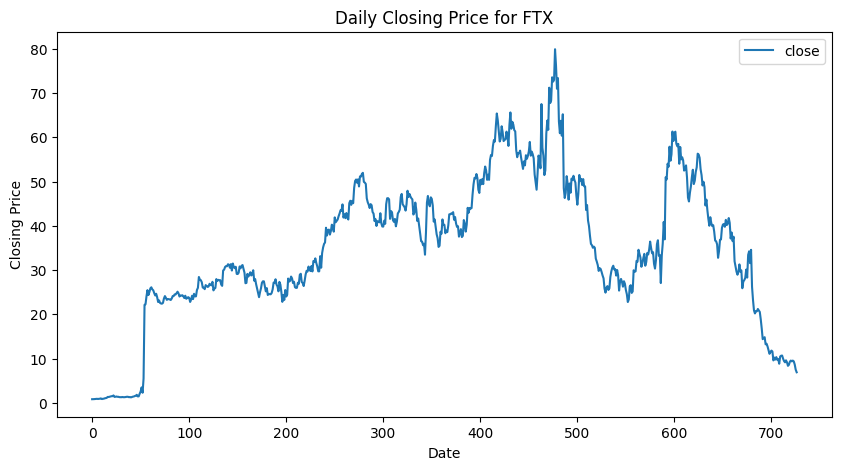

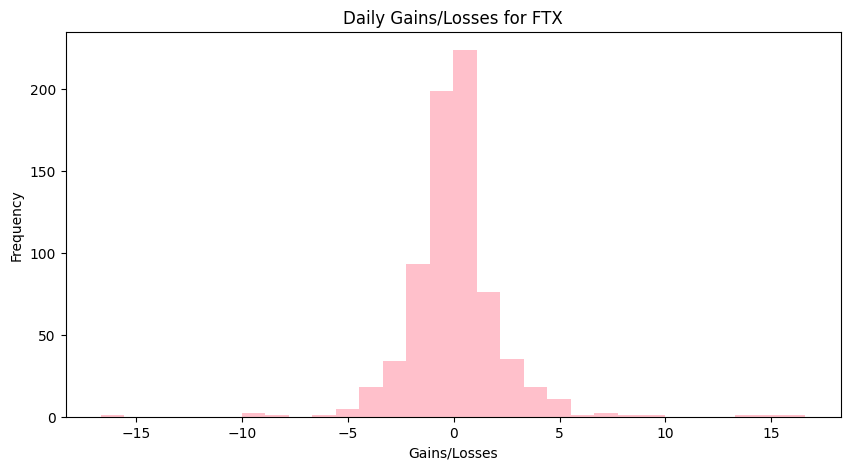

In [54]:
import matplotlib.pyplot as plt
cleaned_df.plot(y='close',kind='line', figsize=(10, 5),title='Daily Closing Price for FTX')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

cleaned_df['close_change'].plot(kind='hist', bins=30, figsize=(10, 5), color='pink',
                                    title='Daily Gains/Losses for FTX')
plt.xlabel('Gains/Losses')
plt.ylabel('Frequency')
plt.show()

## BONUS! (1 pt)

Combine the two plots from #8 above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

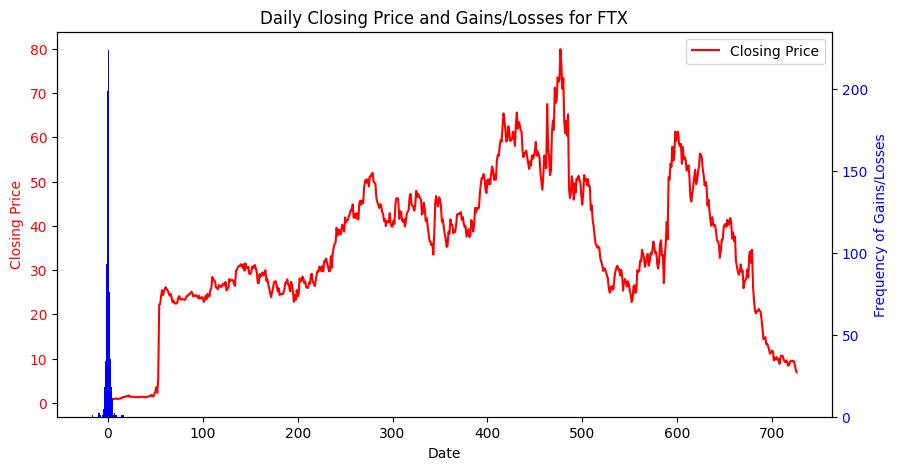

In [55]:
fig, ax1 = plt.subplots(figsize=(10, 5))
cleaned_df.plot(y='close',ax=ax1, color='red', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
cleaned_df['close_change'].plot(kind='hist', bins=30, ax=ax2, color='blue',
                                    label='Gains/Losses')
ax2.set_ylabel('Frequency of Gains/Losses', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
plt.title('Daily Closing Price and Gains/Losses for FTX')
plt.show()